# Исследование данных о российском кинопрокате.



**Заказчик исследования** — Министерство культуры Российской Федерации.

**Цель исследования** - исследовать рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.


**Входные данные** - данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Для достижения поставленной цели решим следующие **задачи**:

1. Изучим общую информацию о данных, объединим два датасета.
2. Проведем предобработку данных:
- проверим типы данных;
- изучим пропуски в датасете;
- проверим, есть ли в данных дубликаты;
- изучим столбцы, которые содержат категориальные значения;
- изучим столбцы, которые хранят количественные значения;
- добавим новые столбцы (столбец с информацией о годе проката, столбец с именем и фамилией главного режиссёра, столбец с основным жанром фильма);
3. Проведём исследовательский анализ данных:
- посмотрим, сколько фильмов выходило в прокат каждый год;
- изучим, как менялась динамика проката по годам;
- посчитаем среднюю и медианную сумму сборов для каждого года;
- определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате.
4. Исследуем фильмы, которые получили государственную поддержку.
5. Напишем общий вывод.

### Изучим общую информацию о датасетах, объединим два датасета.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**У нас два датасета. Загружаем данные из csv-файлов.**

In [ ]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

**Посмотрим на первые 10 строк первого датасета.**

In [ ]:
mkrf_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


**Посмотрим на первые 10 строк второго датасета.**

In [ ]:
mkrf_shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


**Изучим общую информацию наших датасетов.**

In [ ]:
print('Первый датасет:')
mkrf_movies.info()
print()
print('Второй датасет:')
mkrf_shows.info()

Первый датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   o

**Датасеты имеют общий столбец 'puNumber'. Попробуем их объединить по общему столбцу. Но, сначала, изменим тип столбца 'puNumber' в датасете mkrf_movies на int, т.к. в столбце числа.**

In [ ]:
try:
    mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
except:
    print('Что-то пошло не так! Надо разобраться!')

Что-то пошло не так! Надо разобраться!


**Посмотрим, о чем нам может подсказать ошибка:**

In [ ]:
#mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

**А вот и подсказка: ValueError: invalid literal for int() with base 10: 'нет'.**

**Ошибка заключается в "недопустимом литерале для int () с основанием 10: 'нет' ". Это просто означает, что аргумент, который вы передали в int, не выглядит как число. Конечно, это же слово.**

**Посмотрим на эту строку.**

In [ ]:
mkrf_movies[mkrf_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Что же с ним не так, почему нет номера прокатного удостоверения...**

**Поищем по названию, вдруг есть дубликат.**

In [ ]:
mkrf_movies[mkrf_movies.values  == "Курбан-роман. (История с жертвой)"]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Следовало ожидать. А что если название фильма с лишним пробелом. Поищем по другому:**

In [ ]:
for i in mkrf_movies['title']:
    if 'Курбан' in i:
        print(i)

Курбан-роман. (История с жертвой)
Курбан-роман. (История с жертвой).


In [ ]:
mkrf_movies.query('title == "Курбан-роман. (История с жертвой)" | title == "Курбан-роман. (История с жертвой)."')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Можно было бы полагать, что это неявный дубликат, но не совпадает дата премьеры фильма. Поищем в интернете.**

**На сайте Министерства Культуры Российской Федерации указано два удостоверения на этот фильм (https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/472371/ и https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/469419/), один с номером, другой с "нет". Действительно, у одного фильма может быть несколько прокатных удостоверений, поэтому для объединения наших двух датасетов мы должны "нет" на что-то заменить, например, на "О".**

**Посмотрим, есть ли в наших датасетах фильмы с номером прокатного удостоверения "0".**

In [ ]:
len(mkrf_movies[mkrf_movies['puNumber'] == '0'])

0

In [ ]:
len(mkrf_shows[mkrf_shows['puNumber'] == 0])

0

**Заменим "нет" на 0.**

In [ ]:
mkrf_movies.loc[1797, 'puNumber'] = '0'

**Проверим, что получилось:**

In [ ]:
mkrf_movies[mkrf_movies['puNumber'] == '0']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Теперь можно изменить тип данных.**

In [ ]:
try:
    mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
except:
    print('Что-то опять пошло не так! Надо лучше разбираться!')

**Проверяем:**

In [ ]:
mkrf_movies.dtypes['puNumber']

dtype('int64')

**Объединяем датасеты:**

In [ ]:
movies = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

**Проверяем, что получилось:**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Получилось. Данные присоединились без потерь.**

**Посмотрим на первые 10 строк нового датасета.**

In [ ]:
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


**Посмотрим на последние 10 строк объединенного датасета.**

In [ ]:
movies.tail(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


**Посмотрим на 10 строк датафрейма, выбранных рандомно.**

In [ ]:
movies.sample(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1922,Пирамида.,121027414,2014-11-21T12:00:00.000Z,Художественный,"Фокс Интернэшнл Продакшнз, Силватар Медиа",США,Грегори Левассер,"Александр Ажа, Марк Кантон, Чади Эли Маттар",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.7,"ужасы,триллер,детектив",71880.0
6744,Куда течёт море,111003419,2019-04-11T12:00:00.000Z,Художественный,"ООО ""Эквилибриум""",Россия,В.Салтыков,"Л.Охотин, М.Зильбербург, Л.Зильбербург, Н.Пучкова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.1,"триллер,драма,детектив",421571.5
1549,Небо падших.,111001914,2014-02-20T12:00:00.000Z,Художественный,"ЗАО ""НАРОДНОЕ КИНО""",Россия,В.Донсков,"Е.Зобов, А.Демаков",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
1355,"Карты, деньги, два ствола.",121016213,2013-06-27T12:00:00.000Z,Художественный,"Саммит Интертейнмент, Стив Тиш Компани, Хэнд М...",Великобритания,Гай Ричи,"Мэтью Воэн, Стефен Маркс, Джорджия Мастерс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.6,"боевик,комедия,криминал",NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
3818,Голос матери,111002210,2010-02-25T12:00:00.000Z,Художественный,"ООО ""Яуза - фильм"", ООО Кинокомпания ""Телефильм""",Россия,Х.Нарлиев,"Н.Парамонова, Ю.Мацюк",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Бешеные деньги.,111011713,2013-12-19T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.3,"комедия,история",NaN
2674,Вне времени (2014),121010915,2015-05-25T12:00:00.000Z,Художественный,"Корсан, Блисс Медиа, Лаймлайт Интернэшнл Медиа...",Австралия - Великобритания - Бельгия - Индия,Роланд Жоффе,"Дэйл Дж. Брэдли, Л. Грант Брэдли, Пол Брюлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"фэнтези,мелодрама,приключения",4170249.0
5146,"Возвращение в ""А""",111003011,2011-04-14T12:00:00.000Z,Художественный,"АО ""Казахфильм"" им.Ш.Айманова, ТОО РПО НПЦ ""Ба...",Россия-Казахстан,Е.Михалков-Кончаловский,"ООО ""ПС ТиВиСи"" Киностудия""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"драма,военный",50200.0
7207,Проклятие крови,121025819,2019-09-19T12:00:00.000Z,Художественный,"Ю Эф О Пикчерз, Сафьер Интертейнмент, Вэйд Тог...",США,Джеймс Каллен Брэссак,"Мика Брандт, Каллен Брэссак, Джаред Сэфьер, Дж...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.5,"ужасы,триллер",135020.0


**Вывод:**

Данные были удачно объединены из двух датасетов без потерь. Итоговый датасет представлен в виде таблицы, состоящей из 16 колонок и 7486 строк.

Из них:

4 столбца сформата с плафающей запятой - float
1 столбец с целочисленными значениями - int
и 11 столбцов с типом object

В данных уже можно заметить пропуски, неверные типы данных.

### Проведем предобработку данных.

**Приведем наименование колонок в соответсвие с хорошим стилем:**

In [ ]:
movies = movies.rename(columns={'puNumber' : 'pu_number'})

#### Проверим типы данных

**Посмотрим на типы данных в датасете.**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Необходимо изменить тип данных в следующих столбцах: show_start_date и ratings.**

**Изменим тип данных в колонке 'show_start_date'. Время не указано, поэтому обойдёмся только датой.**

In [ ]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d')

**Изменим тип данных в колонке 'ratings'.**

In [ ]:
try:
    movies['ratings'] = movies['ratings'].astype('float')
except:
    print('Что-то пошло не так! Надо разобраться!')

Что-то пошло не так! Надо разобраться!


**Разберемся. Выведем уникальные значения столбца.**

In [ ]:
movies['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [ ]:
movies['ratings'].isna().sum()

967

**Имеем пропуски и проценты!! Рейтинг обычно в пределах 10.0. Скорее всего в эти данные закралась ошибка, поэтому необхимо все процентные значения перевести в NaN.**

In [ ]:
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')

In [ ]:
movies['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, nan])

In [ ]:
movies['ratings'].isna().sum()

996

**Убедимся, что все получилось:**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод:**

В результате предобработки данных были изменены типы данных в следующих столбцах:
- show_start_date на datetime;
- ratings на float.

#### Изучим пропуски в датасете

**Посмотрим на количество пропусков в датасете:**

In [ ]:
movies.isna().sum().sort_values()

title                       0
pu_number                   0
show_start_date             0
type                        0
age_restriction             0
production_country          2
director                    9
film_studio                18
producer                  568
genres                    976
ratings                   996
box_office               4328
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
dtype: int64

**Посмотрим на количество пропусков в процентах:**

In [ ]:
round(movies.isna().mean().sort_values()*100,2)

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
age_restriction           0.00
production_country        0.03
director                  0.12
film_studio               0.24
producer                  7.59
genres                   13.04
ratings                  13.30
box_office               57.81
refundable_support       95.57
nonrefundable_support    95.57
budget                   95.57
financing_source         95.57
dtype: float64

**Посмотрим на небольшие пропуски глазами.**

**Посмотрим на пропуски в колонке production_country:**

In [ ]:
movies.loc[movies['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


**Эти 2 киноленты родом из России. Заменим пропуски на "Россия":**

In [ ]:
movies.loc[movies['production_country'].isna() == True, 'production_country'] = 'Россия'

**Посмотрим на пропуски в колонке director:**

In [ ]:
movies.loc[movies['director'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


**Пропусков в колонке director 9. Основная часть - записи выступлений/концертов. Пропуски заменим на 'неизвестно'.**

In [ ]:
movies.loc[movies['director'].isna() == True, 'director'] = 'неизвестно'

**Посмотрим на пропуски в колонке film_studio:**

In [ ]:
movies.loc[movies['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,неизвестно,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Пропусков в колонке 18. К сожалению, здесь мы тоже бессильны. Оставим пропуски как есть. Так же поступим и с пропусками в колонке producer.**

**Пропуски в колонках genres заменим на 'неизвестно'**

In [ ]:
movies.loc[movies['genres'].isna() == True, 'genres'] = 'неизвестно'

**Заполнить пропуски в box_office тоже не представляется возможным.**

**А вот пропуски в колонках refundable_support, nonrefundable_support, budget, financing_source подозрительно одинаковы.**

In [ ]:
len(movies.loc[
    (movies['refundable_support'].isna()) &
    (movies['nonrefundable_support'].isna()) &
    (movies['budget'].isna()) &
    (movies['financing_source'].isna())
])

7154

In [ ]:
movies[['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].isna().corr()

,refundable_support,nonrefundable_support,budget,financing_source
refundable_support,1.0,1.0,1.0,1.0
nonrefundable_support,1.0,1.0,1.0,1.0
budget,1.0,1.0,1.0,1.0
financing_source,1.0,1.0,1.0,1.0


**Значения в колонках refundable_support, nonrefundable_support, budget, financing_source пропущены по одним и тем же строкам. Столбец budget включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Ну что ж, значит, все остальные фильмы снимались без поддержки государства.**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод:**

В результате предобработки данных были обнаружены пропуски в следующих значениях:
- production_country, заполнены полностью;
- director - 9 пропусков или 0,12% - заполнены 'неизвестно';
- film_studio - 18 пропусков или 0,24% - не заполнены;
- producer - 568 пропусков или 7,59% - не заполнены;
- genres - 976 пропусков или 13,04% - заполнены 'неизвестно';
- ratings - 996 пропусков или 13,30% - не заполнены;
- box_office - 4328 пропусков или 57,81% - не заполнены;
- refundable_support, nonrefundable_support, budget, financing_source - 7154 пропусков или 95,57% в каждом - не заполнены, они означают, что только 4,43% кинолент получило государственную поддержку.

#### Проверим, есть ли дубликаты в данных.

**Проверим датасет на наличие явных дубликатов:**

In [ ]:
movies.duplicated().sum()

0

**Явных дубликатов нет.**

**Посмотрим, сколько дубликатов в колонке title:**

In [ ]:
movies[movies['title'].duplicated()].shape[0]

714

In [ ]:
movies[movies['title'].duplicated(keep=False)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN


**Дубликаты в данной колонке не удаляем, одна и та же лента может иметь несколько прокатных удостоверений.**

**Посмотрим, сколько дубликатов в колонке pu_number:**

In [ ]:
movies[movies['pu_number'].duplicated()].shape[0]

2

In [ ]:
movies[movies['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


**Данные прокатные удостоверения были проверены на сайте Министерства Культуры, действительно, за каждым из них зарегистрированно по две киноленты в один и тот же день. Что ж вполне может быть, эти киноленты показывали в один день разными сеансами или в разных залах одного кинотеатра. Дубликаты не удаляем.**

**В остальных столбцах дубликаты вполне могут быть и они не представляют опасности.**

**Вывод:**

Явных дубликатов нет. В столбцах с названием фильма и номером удостоверения выявлены дубликаты, но они имеют свою уникальность в каждом случае.

#### Изучим столбцы, которые содержат категориальные значения

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Изучим колонку type**

In [ ]:
len(movies['type'].unique())

8

In [ ]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

**Есть проблема с пробелам, происходит задваивание наименования. Исправим это.**

In [ ]:
movies['type'] = movies['type'].str.strip()

In [ ]:
len(movies['type'].unique())

6

In [ ]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [ ]:
cat = movies[['film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']]

In [ ]:
for col in cat:
    print(col)
    print('Количество уникальных значений:', len(movies[col].unique()))
    print('Уникальные значения:', movies[col].unique())
    print()

film_studio
Количество уникальных значений: 5491
Уникальные значения: ['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']

production_country
Количество уникальных значений: 950
Уникальные значения: ['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧС

**Вывод:**

В результате предобработки данных были удалены лишние пробелы в столбце type. Большинство категориальных колонок очень многочисленны, они имеют составные значения (несколько стран, несколько жанров в одной стр.)

#### Изучим столбцы, которые содержат количественные значения

**Посмотрим на количественные значения в столбце.**

In [ ]:
movies.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


**Для удобства сократим нули в количественных данных, запомним, что данные в млн.рублей**

In [ ]:
movies['refundable_support'] = movies['refundable_support']/1000000
movies['nonrefundable_support'] = movies['nonrefundable_support']/1000000
movies['budget'] = movies['budget']/1000000
movies['box_office'] = movies['box_office']/1000000

In [ ]:
movies.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,332.000000,332.000000,332.000000,6490.000000,3158.000000
mean,1.351785e+08,11.864458,48.980989,127.229717,6.479245,76.478696
std,3.838218e+07,24.916555,59.980118,188.588333,1.101665,240.353123
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.120250e+08,0.000000,25.000000,42.000000,5.900000,0.086239
50%,1.210155e+08,0.000000,30.000000,68.649916,6.600000,2.327988
75%,1.240033e+08,15.000000,40.375000,141.985320,7.200000,23.979671
max,2.310011e+08,180.000000,400.000000,2305.074303,9.200000,3073.568691


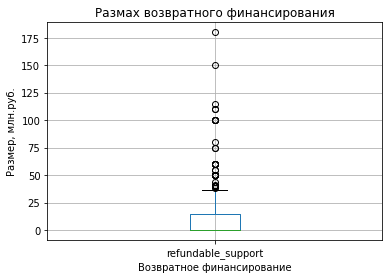

In [ ]:
movies.boxplot('refundable_support');
plt.title('Размах возвратного финансирования')
plt.ylabel('Размер, млн.руб.')
plt.xlabel('Возвратное финансирование')
plt.show;

**Минимальный размер возвратного финансирования - 0, максимальный - 180 млн.**

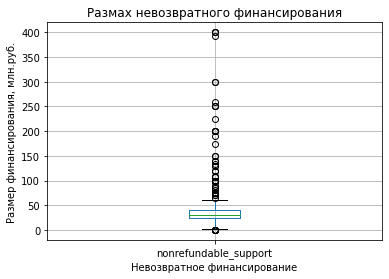

In [ ]:
movies.boxplot('nonrefundable_support');
plt.title('Размах невозвратного финансирования')
plt.ylabel('Размер финансирования, млн.руб.')
plt.xlabel('Невозвратное финансирование');
plt.show;

**Минимальный размер невозвратного финансирования - 0, максимальный - 400 млн.**

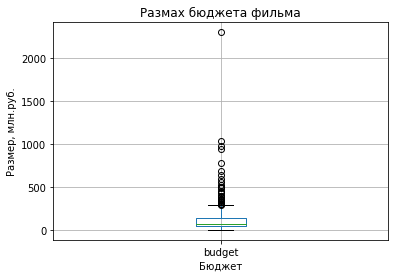

In [ ]:
movies.boxplot('budget');
plt.title('Размах бюджета фильма')
plt.ylabel('Размер, млн.руб.')
plt.xlabel('Бюджет')
plt.show;

**Минимальный размер бюджета - 0, максимальный - 2305 млн.**

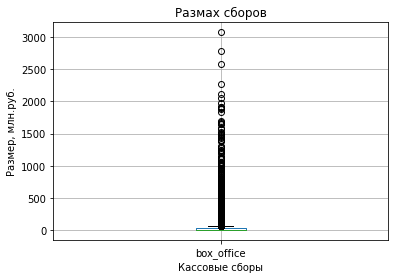

In [ ]:
movies.boxplot('box_office');
plt.title('Размах сборов')
plt.ylabel('Размер, млн.руб.')
plt.xlabel('Кассовые сборы')
plt.show;

**Минимальный размер кассовых сборов - 0, максимальный - 3073 млн.**

**В столбцах содержащих размер бюджета и возвратного и невозвратного финансирования очень много пропусков.**

**Видно, что есть фильмы с нулевым бюджетом. Необходимо проверить есть ли фильмы, в которых бюджет нулевой и присутствует финансирование.**

In [ ]:
movies.loc[movies['refundable_support'] + movies['nonrefundable_support'] >= movies['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23.000000,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234016
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75.000000,0.0,Фонд кино,6.6,драма,446.163511
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.0,70.000000,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.572438
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.0,0.000000,0.0,Фонд кино,6.2,"комедия,фэнтези",67.418975
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.0,100.000000,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59.000000,0.0,Фонд кино,6.3,"комедия,драма",1.957739
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35.000000,0.0,Фонд кино,5.1,"комедия,мелодрама",72.937783
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6.000000,0.0,Министерство культуры,4.3,комедия,15.362931
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19.0,51.000000,0.0,Фонд кино,6.3,"комедия,мелодрама",70.299052
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250.000000,0.0,Фонд кино,5.6,фантастика,1038.321489


**Да, такие фильмы есть. Заполнить колонку budget за счет значений в колонках refundable_support и nonrefundable_support будет неверным решением. Т.к. вряд ли кино снималось только за счет государственной поддержки. Эти строки лучше удалить совсем.**

In [ ]:
delet = movies.loc[movies['refundable_support'] + movies['nonrefundable_support'] >= movies['budget']].index

In [ ]:
movies = movies.drop(delet)

**Проверим:**

In [ ]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
pu_number,7469.0,1.352311e+08,3.840992e+07,0.000000,1.130001e+08,1.210155e+08,1.240033e+08,2.310011e+08
refundable_support,315.0,1.160317e+01,2.515144e+01,0.000000,0.000000e+00,0.000000e+00,1.000000e+01,1.800000e+02
nonrefundable_support,315.0,4.810704e+01,5.988614e+01,0.000000,2.500000e+01,3.000000e+01,4.000000e+01,4.000000e+02
budget,315.0,1.340961e+02,1.912260e+02,14.462464,4.615387e+01,7.337955e+01,1.500043e+02,2.305074e+03
ratings,6474.0,6.481109e+00,1.101504e+00,1.000000,5.900000e+00,6.600000e+00,7.200000e+00,9.200000e+00
box_office,3141.0,7.600967e+01,2.402503e+02,0.000000,8.395000e-02,2.284862e+00,2.344112e+01,3.073569e+03


**Вывод:**

В результате предобработки данных были удалены строки где сумма господдержки превышала бюджет. Потеря данных составила 17 строк или 0,23% от первоначального датасета.
В столбцах содержащих размер бюджета и размер возвратного и невозвратного финансирования очень много пропусков - эти данные заполены только по тем кинолентам, которые получили господдержку.

#### Добавим новые столбцы

- Создадим с информацией о годе проката

In [ ]:
movies['show_start_year'] = movies['show_start_date'].dt.year

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7469 non-null   object             
 1   pu_number              7469 non-null   int64              
 2   show_start_date        7469 non-null   datetime64[ns, UTC]
 3   type                   7469 non-null   object             
 4   film_studio            7451 non-null   object             
 5   production_country     7469 non-null   object             
 6   director               7469 non-null   object             
 7   producer               6901 non-null   object             
 8   age_restriction        7469 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

In [ ]:
movies.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",0.0027,2013
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014


- Создадим два столбца с именем и фамилией главного режиссёра и основным жанром фильма

In [ ]:
def get_first_value(s):
    return s.split(',')[0]

movies['main_director'] = movies['director'].apply(get_first_value)
movies['main_genre'] = movies['genres'].apply(get_first_value)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7485
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7469 non-null   object             
 1   pu_number              7469 non-null   int64              
 2   show_start_date        7469 non-null   datetime64[ns, UTC]
 3   type                   7469 non-null   object             
 4   film_studio            7451 non-null   object             
 5   production_country     7469 non-null   object             
 6   director               7469 non-null   object             
 7   producer               6901 non-null   object             
 8   age_restriction        7469 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

In [ ]:
movies.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка

In [ ]:
movies['support_ratio'] = (((movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget'])*100).round(2)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7469 non-null   object             
 1   pu_number              7469 non-null   int64              
 2   show_start_date        7469 non-null   datetime64[ns, UTC]
 3   type                   7469 non-null   object             
 4   film_studio            7451 non-null   object             
 5   production_country     7469 non-null   object             
 6   director               7469 non-null   object             
 7   producer               6901 non-null   object             
 8   age_restriction        7469 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

In [ ]:
movies.tail(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,support_ratio
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30.0,46.154000,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,65.0
7477,Тридцать,121038419,2019-12-26 12:00:00+00:00,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN,2019,Симона Костова,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40.0,60.0,150.147502,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,66.6
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,2019,Д.Григорьев,неизвестно,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,0.219569,2019,Ник Пойнц,неизвестно,NaN
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,2019,Фил Грабски,неизвестно,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,2019,Чарльз Е.Бастьен,неизвестно,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,2019,А.Беляев,неизвестно,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN,2019,И.Трусов,комедия,NaN


In [ ]:
movies.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,support_ratio
count,7.469000e+03,315.000000,315.000000,315.000000,6474.000000,3141.000000,7469.000000,315.000000
mean,1.352311e+08,11.603175,48.107044,134.096082,6.481109,76.009675,2014.590307,51.738762
std,3.840992e+07,25.151439,59.886141,191.226040,1.101504,240.250266,3.009989,17.004822
min,0.000000e+00,0.000000,0.000000,14.462464,1.000000,0.000000,2010.000000,4.400000
25%,1.130001e+08,0.000000,25.000000,46.153866,5.900000,0.083950,2012.000000,37.345000
50%,1.210155e+08,0.000000,30.000000,73.379554,6.600000,2.284862,2015.000000,59.230000
75%,1.240033e+08,10.000000,40.000000,150.004287,7.200000,23.441120,2017.000000,65.690000
max,2.310011e+08,180.000000,400.000000,2305.074303,9.200000,3073.568691,2019.000000,78.470000


**Вывод:**

В датасет добавлены следующие столбцы:
- show_start_year - год проката киноленты
- main_director - имя и фамилия главного режиссёра
- main_genre - основной жанр киноленты
- support_ratio - долю государственной поддержки в бюджете киноленты.

**Вывод по 2 части:**

В результате предобработки данных:
1. Были изменены типы данных в следующих столбцах:
- show_start_date на datetime;
- ratings на float.

2. Были обнаружены пропуски в следующих значениях:
- production_country - 2 пропуска - заполнены полностью;
- director - 9 пропусков или 0,12% - заполнены 'неизвестно';
- film_studio - 18 пропусков или 0,24% - не заполнены;
- producer - 568 пропусков или 7,59% - не заполнены;
- genres - 976 пропусков или 13,04% - заполнены 'неизвестно';
- ratings - 996 пропусков или 13,30% - не заполнены;
- box_office - 4328 пропусков или 57,81% - не заполнены;
- refundable_support, nonrefundable_support, budget, financing_source - 7154 пропусков или 95,57% в каждом - не заполнены, они означают, что только 4,43% кинолент получило государственную поддержку.

3. Была проведена проверка на дубликаты. Явных дубликатов нет. В столбцах с названием фильма и номером удостоверения выявлены дубликаты, но они имеют свою уникальность в каждом случае.

4. Были удалены лишние пробелы в столбце type. Большинство категориальных колонок очень многочисленны, они имеют составные значения (несколько стран, несколько жанров в одной стр.)

5. Были удалены строки где сумма господдержки превышала бюджет. Потеря данных составила 17 строк или 0,23% от первоначального датасета.

6. В датасет добавлены следующие столбцы:
- show_start_year - год проката киноленты
- main_director - имя и фамилия главного режиссёра
- main_genre - основной жанр киноленты
- support_ratio - долю государственной поддержки в бюджете киноленты.

### Проведем исследовательский анализ данных

**- Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.**

In [ ]:
movie_1 = movies.groupby('show_start_year')['box_office'].count().reset_index()
movie_1

,show_start_year,box_office
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,278
5,2015,459
6,2016,523
7,2017,355
8,2018,471
9,2019,529


In [ ]:
movie_2 = (movies[['show_start_year','box_office']]
         .groupby('show_start_year')
         .apply(lambda x : x['box_office']
         .apply(pd.notna).mean()) * 100).to_frame().reset_index()
movie_2

,show_start_year,0
0,2010,10.659898
1,2011,17.524116
2,2012,21.585160
3,2013,29.206349
4,2014,34.491315
5,2015,65.665236
6,2016,64.171779
7,2017,70.576541
8,2018,53.100338
9,2019,56.942949


In [ ]:
movie = movie_1.merge(movie_2, how='left', on='show_start_year')
movie

,show_start_year,box_office,0
0,2010,105,10.659898
1,2011,109,17.524116
2,2012,128,21.585160
3,2013,184,29.206349
4,2014,278,34.491315
5,2015,459,65.665236
6,2016,523,64.171779
7,2017,355,70.576541
8,2018,471,53.100338
9,2019,529,56.942949


In [ ]:
movie_1['cinema_part'] = (movies[['show_start_year','box_office']]
         .groupby('show_start_year')
         .apply(lambda x : x['box_office']
         .apply(pd.notna).mean()) * 100)
movie_1

,show_start_year,box_office,cinema_part
0,2010,105,NaN
1,2011,109,NaN
2,2012,128,NaN
3,2013,184,NaN
4,2014,278,NaN
5,2015,459,NaN
6,2016,523,NaN
7,2017,355,NaN
8,2018,471,NaN
9,2019,529,NaN


In [ ]:
movie.rename(columns={0 : 'cinema_part'}, inplace=True)

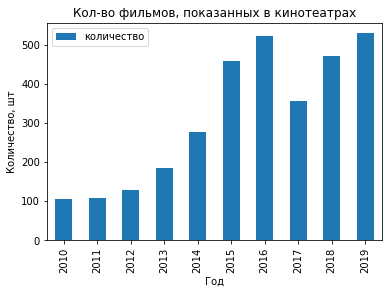

In [ ]:
movie.plot(x='show_start_year', y='box_office', kind='bar');
plt.title('Кол-во фильмов, показанных в кинотеатрах')
plt.xlabel('Год')
plt.ylabel('Количество, шт')
plt.legend(['количество'])
plt.show;

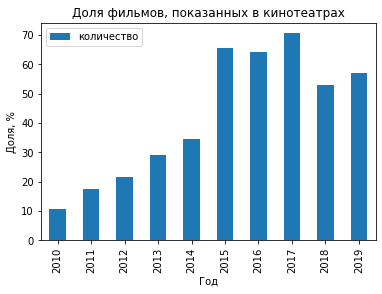

In [ ]:
movie.plot(x='show_start_year', y='cinema_part', kind='bar');
plt.title('Доля фильмов, показанных в кинотеатрах')
plt.xlabel('Год')
plt.ylabel('Доля, %')
plt.legend(['количество'])
plt.show;

**Вывод:**

Меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля с 2014 по 2014 гг варьируется от 10 до 34 процентов. В эти годы было меньше всего кинопоказов. Самый большое количество кинопоказов в кинотеатрах в 2019, хотя доля этих фильмов за этот год не самая большая в сравнение с другими годами. В целом, количесвто фильмов в прокате растет. Полнее всего предоставленн в данных период начиная с 2015 года.

**- Изучим, как менялась динамика проката по годам.**

In [ ]:
rental_dynamics_1 = movies.pivot_table(index='show_start_year', values='box_office', aggfunc=['sum', 'min', 'max'])
rental_dynamics_1

,sum,min,max
,box_office,box_office,box_office
show_start_year,,,
2010,2.428654,0.000000,1.446400
2011,14.102765,0.000125,11.618085
2012,6.955423,0.000000,2.311220
2013,29.799706,0.000000,19.957031
2014,7434.717843,0.000000,1016.410635
2015,38527.827199,0.000000,1658.861425
2016,46742.316269,0.000000,2048.126108
2017,48458.147254,0.007900,2779.686144


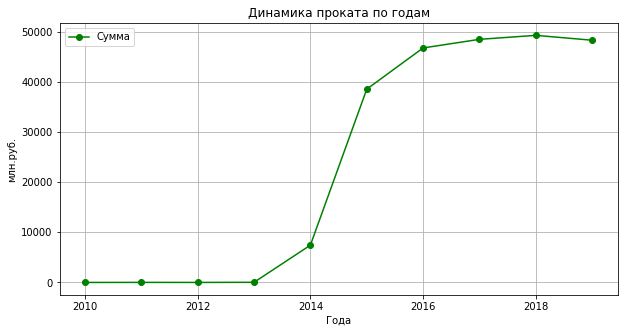

In [ ]:
rental_dynamics_1.plot(y='sum', style='-o', figsize=(10,5), grid=True, color='green')
plt.title('Динамика проката по годам')
plt.ylabel('млн.руб.')
plt.xlabel('Года')
plt.legend(['Сумма'])
plt.show()

**Вывод:**

Минимальной суммой кассовых сборов была в период с 2010 по 2013 гг. Это говорит о том, что данные о кассовых сборах начали собираться с 2014 года. Максимальная сумма кассовых сборов приходится на 2018 год.

**- Посчитаем среднюю и медианную сумму сборов для каждого года.**

In [ ]:
rental_dynamics_2 = movies.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
rental_dynamics_2

,mean,median
,box_office,box_office
show_start_year,,
2010,0.023130,0.001700
2011,0.129383,0.003000
2012,0.054339,0.005660
2013,0.161955,0.003523
2014,26.743589,0.018138
2015,83.938621,4.784782
2016,89.373454,3.776088
2017,136.501823,9.919415


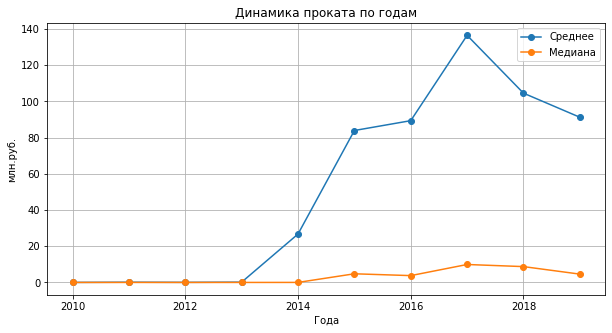

In [ ]:
rental_dynamics_2.plot(y=['mean', 'median'], style='-o', figsize=(10,5), grid=True)
plt.title('Динамика проката по годам')
plt.ylabel('млн.руб.')
plt.xlabel('Года')
plt.legend(['Среднее', 'Медиана'])
plt.show()

**Вывод:**

Медианное значение по кассовым сборам сильно отличается от среднего значения за каждый год. Скорее всего есть фильмы с большими кассовыми сборами, которые влияют на показатель среднего значения.

**- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.**

In [ ]:
age = movies.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()
age

,show_start_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379.054578
1,2015,«12+» - для детей старше 12 лет,13419.509571
2,2015,«16+» - для детей старше 16 лет,10781.600601
3,2015,«18+» - запрещено для детей,5430.350629
4,2015,«6+» - для детей старше 6 лет,8517.311820
5,2016,«0+» - для любой зрительской аудитории,150.228849
6,2016,«12+» - для детей старше 12 лет,11150.762104
7,2016,«16+» - для детей старше 16 лет,16594.249490
8,2016,«18+» - запрещено для детей,6793.929819
9,2016,«6+» - для детей старше 6 лет,12053.146008


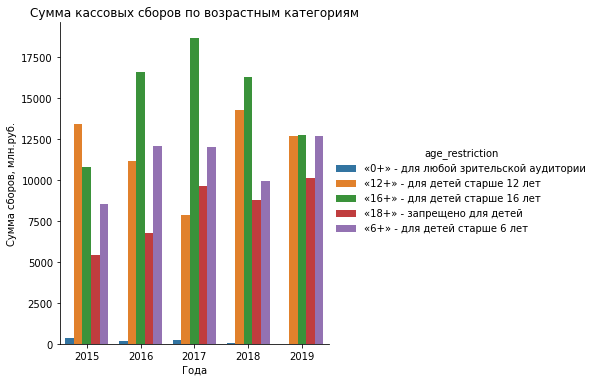

In [ ]:
fg = sns.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=age, kind='bar');
plt.title('Сумма кассовых сборов по возрастным категориям')
plt.ylabel('Сумма сборов, млн.руб.')
plt.xlabel('Года')
plt.show();

**Вывод:**

Наибольшей популярностью пользуются фильмы для категории 16+. Они занимают лидирующие позиции каждый год, кроме 2015, т.к. расчитаны на более широкую аудиторию. В 2019 году фильмы для категории 12+, 16+ и 6+ находятся почти на одинаковом уровне. А вот фильмы для взрослых каждый год находятся в "тени" других категорий. И верно, на  такой фильм семьей не сходишь.

По общей сумме сборов лидирует категория "16+", однако лидером по средней и медиане является категория 6+ - на эти фильмы всегда стараются ходить семьей. Поэтому эта категория всегда стабильно будет приносить доход.

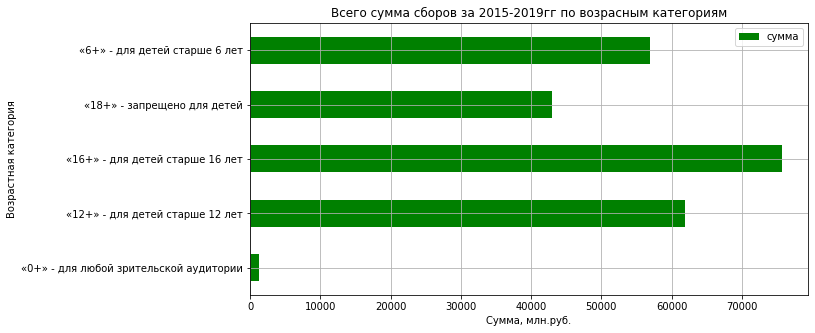

In [ ]:
movies.groupby('age_restriction')['box_office'].sum(). \
        plot(y='sum', style='-o', figsize=(10,5), grid=True, color='green', kind='barh')
plt.title('Всего сумма сборов за 2015-2019гг по возрасным категориям')
plt.ylabel('Возрастная категория')
plt.xlabel('Сумма, млн.руб.')
plt.legend(['сумма'])
plt.show()

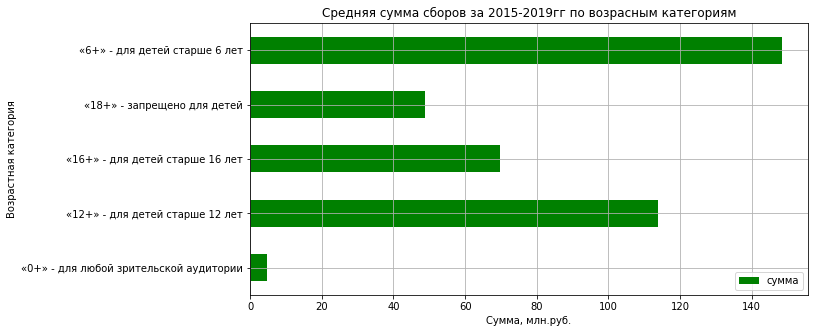

In [ ]:
movies.groupby('age_restriction')['box_office'].mean(). \
        plot(y='sum', style='-o', figsize=(10,5), grid=True, color='green', kind='barh')
plt.title('Средняя сумма сборов за 2015-2019гг по возрасным категориям')
plt.ylabel('Возрастная категория')
plt.xlabel('Сумма, млн.руб.')
plt.legend(['сумма'])
plt.show()

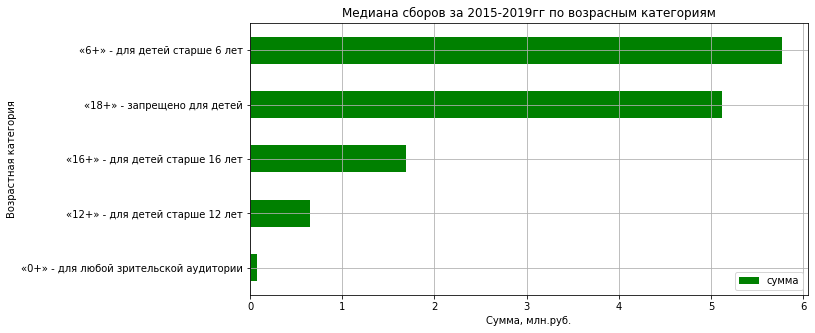

In [ ]:
movies.groupby('age_restriction')['box_office'].median(). \
        plot(y='sum', style='-o', figsize=(10,5), grid=True, color='green', kind='barh')
plt.title('Медиана сборов за 2015-2019гг по возрасным категориям')
plt.ylabel('Возрастная категория')
plt.xlabel('Сумма, млн.руб.')
plt.legend(['сумма'])
plt.show()

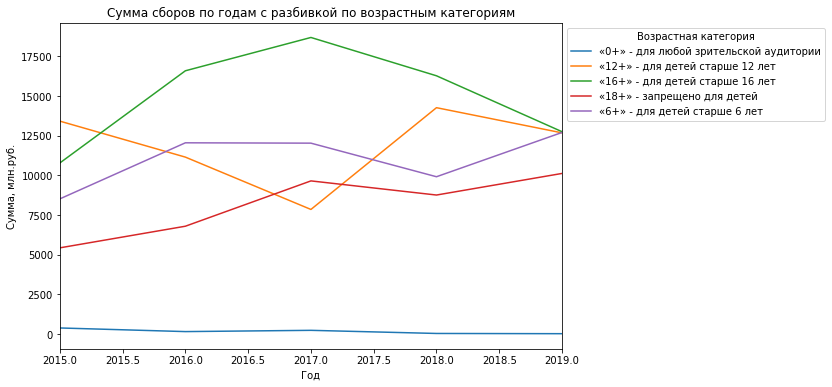

In [ ]:
movies.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum') \
.plot(title='Cумма сборов по годам с разбивкой по возрастным категориям', figsize=(9, 6), kind='line', xlim=[2015, 2019])
plt.xlabel('Год')
plt.ylabel('Сумма, млн.руб.')
plt.legend(title='Возрастная категория', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

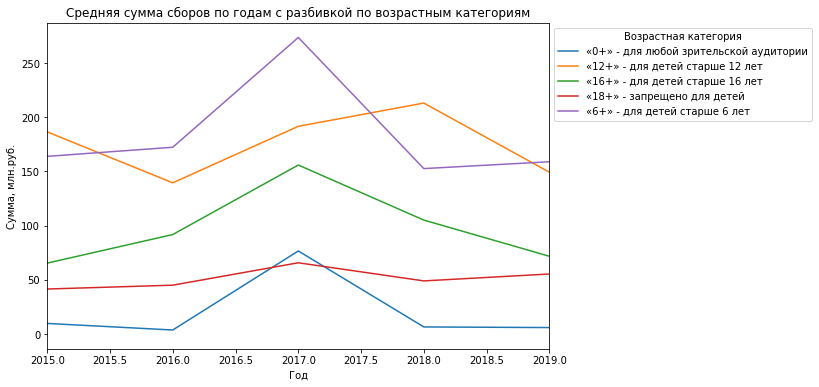

In [ ]:
movies.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='mean') \
.plot(title='Средняя сумма сборов по годам с разбивкой по возрастным категориям', figsize=(9, 6), kind='line', xlim=[2015, 2019])
plt.xlabel('Год')
plt.ylabel('Сумма, млн.руб.')
plt.legend(title='Возрастная категория', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

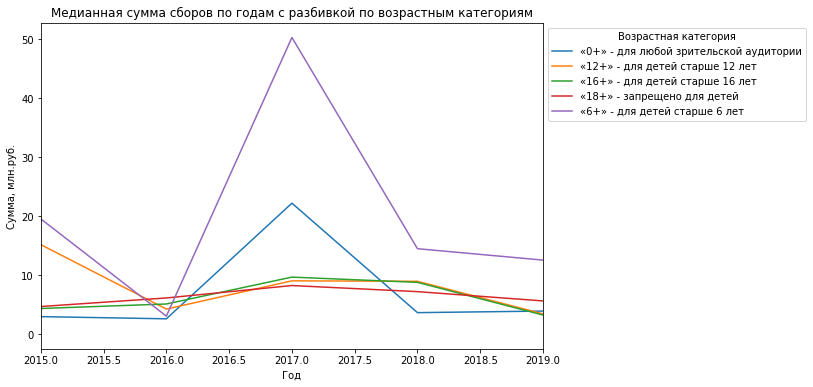

In [ ]:
movies.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='median') \
.plot(title='Медианная сумма сборов по годам с разбивкой по возрастным категориям', figsize=(9, 6), kind='line', xlim=[2015, 2019])
plt.xlabel('Год')
plt.ylabel('Сумма, млн.руб.')
plt.legend(title='Возрастная категория', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

**Вывод по 3 части:**

Меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля с 2014 по 2014 гг варьируется от 10 до 34 процентов. В эти годы было меньше всего кинопоказов. Самый большое количество кинопоказов в кинотеатрах в 2019, хотя доля этих фильмов за этот год не самая большая в сравнение с другими годами. В целом, количесвто фильмов в прокате растет. Полнее всего предоставленн в данных период начиная с 2015 года.

Минимальной суммой кассовых сборов была в период с 2010 по 2013 гг. Это говорит о том, что данные о кассовых сборах начали собираться с 2014 года. Максимальная сумма кассовых сборов приходится на 2018 год.

Медианное значение по кассовым сборам сильно отличается от среднего значения за каждый год. Скорее всего есть фильмы с большими кассовыми сборами, которые влияют на показатель среднего значения.

Наибольшей популярностью пользуются фильмы для категории 16+. Они занимают лидирующие позиции каждый год, кроме 2015, т.к. расчитаны на более широкую аудиторию. В 2019 году фильмы для категории 12+, 16+ и 6+ находятся почти на одинаковом уровне. А вот фильмы для взрослых каждый год находятся в "тени" других категорий. И верно, на  такой фильм семьей не сходишь.

### Исследуем фильмы, которые получили государственную поддержку

**Создадим отдельный датасет для анализа значений по государственной поддержке.**

In [ ]:
support = movies[movies['budget'].isna() == False].copy()

In [ ]:
support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  315 non-null    object             
 1   pu_number              315 non-null    int64              
 2   show_start_date        315 non-null    datetime64[ns, UTC]
 3   type                   315 non-null    object             
 4   film_studio            315 non-null    object             
 5   production_country     315 non-null    object             
 6   director               315 non-null    object             
 7   producer               313 non-null    object             
 8   age_restriction        315 non-null    object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64        

In [ ]:
support['total_support'] = support['refundable_support'] + support['nonrefundable_support']
support['profit'] = support['box_office'] - support['budget']
support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,support_ratio,total_support,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",0.365354,2013,А.Атанесян,драма,33.37,26.500000,-79.046546
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,неизвестно,0.028140,2014,А.Якимчук,неизвестно,70.00,26.000000,-37.114717
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19.957031,2013,Р.Давлетьяров,комедия,61.27,107.847945,-156.066459
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,0.055918,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,28.000000,-40.518223
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,0.232100,2014,М.Угаров,драма,62.48,25.000000,-39.783022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100.0,...,Фонд кино,6.0,"история,биография,драма",717.703186,2019,А.Кравчук,история,51.02,500.000000,-262.296814
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",501.069235,2019,Д.Шмидт,мультфильм,52.63,100.000000,311.069235
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.97,500.000000,NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,65.00,30.000000,NaN


In [ ]:
support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7478
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  315 non-null    object             
 1   pu_number              315 non-null    int64              
 2   show_start_date        315 non-null    datetime64[ns, UTC]
 3   type                   315 non-null    object             
 4   film_studio            315 non-null    object             
 5   production_country     315 non-null    object             
 6   director               315 non-null    object             
 7   producer               313 non-null    object             
 8   age_restriction        315 non-null    object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64        

In [ ]:
sup = support.pivot_table(index='show_start_year', values='total_support', aggfunc=['sum'])
sup

,sum
,total_support
show_start_year,
2013,134.347945
2014,549.002299
2015,3227.241459
2016,3977.155482
2017,3098.971662
2018,3098.000000
2019,4724.000000


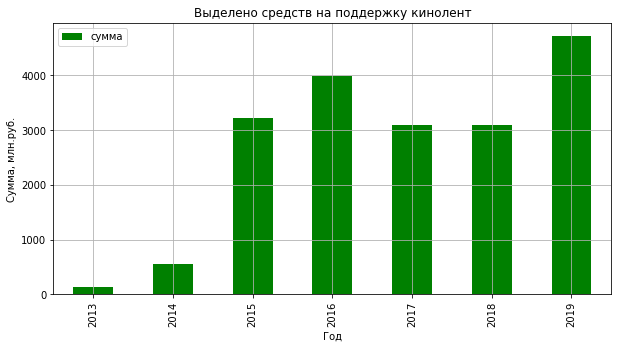

In [ ]:
sup.plot(y='sum', style='-o', figsize=(10,5), grid=True, color='green', kind='bar')
plt.title('Выделено средств на поддержку кинолент')
plt.ylabel('Сумма, млн.руб.')
plt.xlabel('Год')
plt.legend(['сумма'])
plt.show()

**С каждым годом непланомерно, но растет государственная поддержка выпуска кинолент по сумме  финансирования. Наибольшую сумму Министерство Культуры  выделило в 2019 году.**

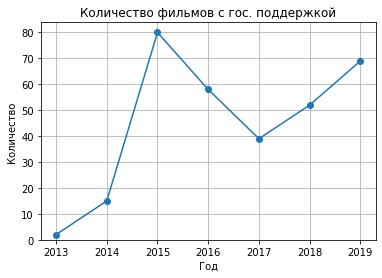

In [ ]:
support.groupby('show_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-');
plt.title('Количество фильмов с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество');

**А вот по количеству профинансированных кинолент картина немного другая. Больше всего было профинансировано кинолент в 2015 году, около 80 кинофильмов. по сравнению с 70-ю в 2019 году. Отмечается спад финансирования по количеству профинансированных кинолент в 2017 году. Т.к. пики роста не совпадают с графиком финансирования по сумме - скорее всего спонсировалось больше фильмов с выделением на каждую картину незначительных сумм.**

In [ ]:
sup_1 = support.pivot_table(index='show_start_year', values='profit', aggfunc=['sum'])
sup_1

,sum
,profit
show_start_year,
2013,-235.113005
2014,-272.296632
2015,-2451.922802
2016,-2252.512301
2017,3892.942769
2018,2865.962647
2019,-2793.053264


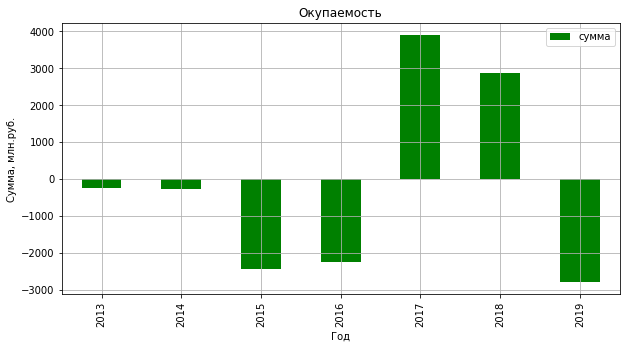

In [ ]:
sup_1.plot(y='sum', style='-o', figsize=(10,5), grid=True, color='green', kind='bar')
plt.title('Окупаемость')
plt.ylabel('Сумма, млн.руб.')
plt.xlabel('Год')
plt.legend(['сумма'])
plt.show()

**По окупаемости картина совсем плачевная, в 2015, 2016 и даже в 2019 гг кассовые сборы не перекрыли сумму гос.поддержки. Это может говорить в том числе и о неполноте данных.**

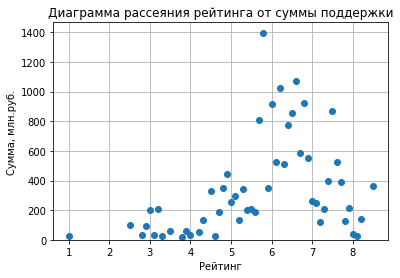

In [ ]:
support.groupby('ratings')['total_support'].sum().plot(ylim=0, grid=True, style='o');
plt.title('Диаграмма рассеяния рейтинга от суммы поддержки');
plt.xlabel('Рейтинг');
plt.ylabel('Сумма, млн.руб.');

**По диаграмме рассеяния видно, что у основной части кинокартин с государственной поддержкой хороший рейтинг, выше 5. Даже у кинокартин с участием государственного финансирования в размере до 200 млн, рейтинг выше 2,5. Выбивается только один фильм с рейтингом 1,0.**

In [ ]:
support.loc[(support['ratings'] < 2) & (support['total_support']<100)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,support_ratio,total_support,profit
3515,Взломать блогеров,111016616,2016-10-28 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.0,...,Фонд кино,1.0,"комедия,мультфильм,фантастика",7.323648,2016,М.Свешников,комедия,69.41,25.0,-28.692621


**Я даже о таком и не слышала(**

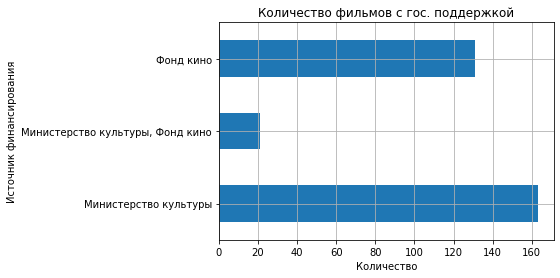

In [ ]:
support.groupby('financing_source')['total_support'].count().plot(ylim=0, grid=True, kind='barh');
plt.title('Количество фильмов с гос. поддержкой');
plt.ylabel('Источник финансирования');
plt.xlabel('Количество');

**Больше всего кинолент профинансировало Министерство культуры, более 160 шт, Фонд Кино чуть меньше - примерно 125 шт. А вот совместно эти организационные структуры профинансировали всего 20 кинолент.**

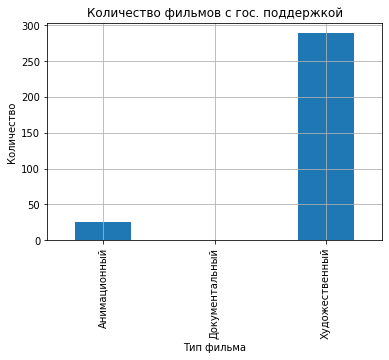

In [ ]:
support.groupby('type')['total_support'].count().plot(ylim=0, grid=True, kind='bar');
plt.title('Количество фильмов с гос. поддержкой');
plt.xlabel('Тип фильма');
plt.ylabel('Количество');

**Чаще всего финансируются художественные фильмы - около 300 кинолент. Почти не финансируются документальные фильмы, чуть чаще, примерно 25 кинолент - анимационного характера.**

**Вывод:**
    
С каждым годом непланомерно, но растет государственная поддержка выпуска кинолент по сумме  финансирования. Наибольшую сумму Министерство Культуры  выделило в 2019 году.

А вот по количеству профинансированных кинолент картина немного другая. Больше всего было профинансировано кинолент в 2015 году, около 80 кинофильмов. по сравнению с 70-ю в 2019 году. Отмечается спад финансирования по количеству профинансированных кинолент в 2017 году. Т.к. пики роста не совпадают с графиком финансирования по сумме - скорее всего спонсировалось больше фильмов с выделением на каждую картину незначительных сумм.

По окупаемости картина совсем плачевная, в 2015, 2016 и даже в 2019 гг кассовые сборы не перекрыли сумму гос.поддержки. Это может говорить в том числе и о неполноте данных о кассовых сборах.

По диаграмме рассеяния видно, что у основной части кинокартин с государственной поддержкой хороший рейтинг, выше 5. Даже у кинокартин с участием государственного финансирования в размере до 200 млн, рейтинг выше 2,5. Выбивается только один фильм с рейтингом 1,0.

Больше всего кинолент профинансировало Министерство культуры, более 160 шт, Фонд Кино чуть меньше - примерно 125 шт. А вот совместно эти организационные структуры профинансировали всего 20 кинолент.

Чаще всего финансируются художественные фильмы - около 300 кинолент. Почти не финансируются документальные фильмы, чуть чаще, примерно 25 кинолент - анимационного характера.

### Напишем общий вывод

Цель исследования достигнута

Для достижения поставленной цели решены следующие задачи:

1. Изучена общая информацию о данных, объединены два датасета.

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Данные были удачно объединены из двух датасетов без потерь. Итоговый датасет представлен в виде таблицы, состоящей из 16 колонок и 7486 строк.

Из них:

4 столбца сформата с плафающей запятой - float
1 столбец с целочисленными значениями - int
и 11 столбцов с типом object

В данных уже можно заметить пропуски, неверные типы данных.

2. В результате предобработки данных:
1). Были изменены типы данных в следующих столбцах:
- show_start_date на datetime;
- ratings на float.

2). Были обнаружены пропуски в следующих значениях:
- production_country - 2 пропуска - заполнены полностью;
- director - 9 пропусков или 0,12% - заполнены 'неизвестно';
- film_studio - 18 пропусков или 0,24% - не заполнены;
- producer - 568 пропусков или 7,59% - не заполнены;
- genres - 976 пропусков или 13,04% - заполнены 'неизвестно';
- ratings - 996 пропусков или 13,30% - не заполнены;
- box_office - 4328 пропусков или 57,81% - не заполнены;
- refundable_support, nonrefundable_support, budget, financing_source - 7154 пропусков или 95,57% в каждом - не заполнены, они означают, что только 4,43% кинолент получило государственную поддержку.

3). Была проведена проверка на дубликаты. Явных дубликатов нет. В столбцах с названием фильма и номером удостоверения выявлены дубликаты, но они имеют свою уникальность в каждом случае.

4). Были удалены лишние пробелы в столбце type. Большинство категориальных колонок очень многочисленны, они имеют составные значения (несколько стран, несколько жанров в одной стр.)

5). Были удалены строки где сумма господдержки превышала бюджет. Потеря данных составила 17 строк или 0,23% от первоначального датасета.

6). В датасет добавлены следующие столбцы:
- show_start_year - год проката киноленты
- main_director - имя и фамилия главного режиссёра
- main_genre - основной жанр киноленты
- support_ratio - долю государственной поддержки в бюджете киноленты.

3. Провели исследовательский анализ данных:
- посмотрели, сколько фильмов выходило в прокат каждый год

Меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля с 2014 по 2014 гг варьируется от 10 до 34 процентов. В эти годы было меньше всего кинопоказов. Самый большое количество кинопоказов в кинотеатрах в 2019, хотя доля этих фильмов за этот год не самая большая в сравнение с другими годами. В целом, количесвто фильмов в прокате растет. Полнее всего предоставленн в данных период начиная с 2015 года.

- изучили, как менялась динамика проката по годам

Минимальной суммой кассовых сборов была в период с 2010 по 2013 гг. Это говорит о том, что данные о кассовых сборах начали собираться с 2014 года. Максимальная сумма кассовых сборов приходится на 2018 год.

- посчитали среднюю и медианную сумму сборов для каждого года

Медианное значение по кассовым сборам сильно отличается от среднего значения за каждый год. Скорее всего есть фильмы с большими кассовыми сборами, которые влияют на показатель среднего значения.

- определили, влияет ли возрастное ограничение аудитории на сборы фильма в прокате

Наибольшей популярностью пользуются фильмы для категории 16+. Они занимают лидирующие позиции каждый год, кроме 2015, т.к. расчитаны на более широкую аудиторию. В 2019 году фильмы для категории 12+, 16+ и 6+ находятся почти на одинаковом уровне. А вот фильмы для взрослых каждый год находятся в "тени" других категорий. И верно, на такой фильм семьей не сходишь.

4. Исследовали фильмы, которые получили государственную поддержку.

С каждым годом непланомерно, но растет государственная поддержка выпуска кинолент по сумме финансирования. Наибольшую сумму Министерство Культуры выделило в 2019 году.

А вот по количеству профинансированных кинолент картина немного другая. Больше всего было профинансировано кинолент в 2015 году, около 80 кинофильмов. по сравнению с 70-ю в 2019 году. Отмечается спад финансирования по количеству профинансированных кинолент в 2017 году. Т.к. пики роста не совпадают с графиком финансирования по сумме - скорее всего спонсировалось больше фильмов с выделением на каждую картину незначительных сумм.

По окупаемости картина совсем плачевная, в 2015, 2016 и даже в 2019 гг кассовые сборы не перекрыли сумму гос.поддержки. Это может говорить в том числе и о неполноте данных о кассовых сборах.

По диаграмме рассеяния видно, что у основной части кинокартин с государственной поддержкой хороший рейтинг, выше 5. Даже у кинокартин с участием государственного финансирования в размере до 200 млн, рейтинг выше 2,5. Выбивается только один фильм с рейтингом 1,0.

Больше всего кинолент профинансировало Министерство культуры, более 160 шт, Фонд Кино чуть меньше - примерно 125 шт. А вот совместно эти организационные структуры профинансировали всего 20 кинолент.

Чаще всего финансируются художественные фильмы - около 300 кинолент. Почти не финансируются документальные фильмы, чуть чаще, примерно 25 кинолент - анимационного характера.

5. Написан общий вывод.

В соответствии с выщеизложенным, следует предположить, что фильмы, получившие государственную поддержку - интересны населению, что подтверждает рейтинг этих кинолент.

Кроме того, рекомендуем обратить внимание на полноту и корректность предоставленных данных:

- наличие большого количества пропусков.
- корректность значений по статье бюджет.
- особое внимание следует уделить категориальным значениям (например, жанр, страна, студия-производитель, режиссер, продюсер).

Следует провести анализ причин и разработать методы по недопущению возникновения пропусков, некорректного заполнения значений и большого количества многозначных категорий.

В целом, наличие пропусков и некорректных значений, сложных многозначных категориальных значений при неправильной их обработке после сбора инфромации, может привести к ошибкам в моделях и принятии решения.